Implementation of simple linear regression

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

y=c+m1x1+m2x2+...+mnxn 

y  is the response
c  is the intercept
m1  is the coefficient for the first feature
mn  is the coefficient for the nth feature

In [3]:
"""#import data files
dataset =pd.read_csv("ml/Salary_Data.csv")
# assign x(independent) and y(dependent) variable
url  = "https://raw.githubusercontent.com/devzohaib/Simple-Linear-Regression/master/tvmarketing.csv"
dataset = pd.read_csv(url)"""
dataset =pd.read_csv("sales_data.csv")
X = dataset.iloc[:, :-1].values
Y =dataset.iloc[:,-1]

#dataset.to_csv('sales_data.csv', index=False)


In [4]:
#spliting the dataset into training and test set
#for this import 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 1/3, random_state = 0) #state of random factors

# Train the simple linear model

In [5]:
#import linear regression class
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [6]:
y_pred=regressor.predict(X_test)

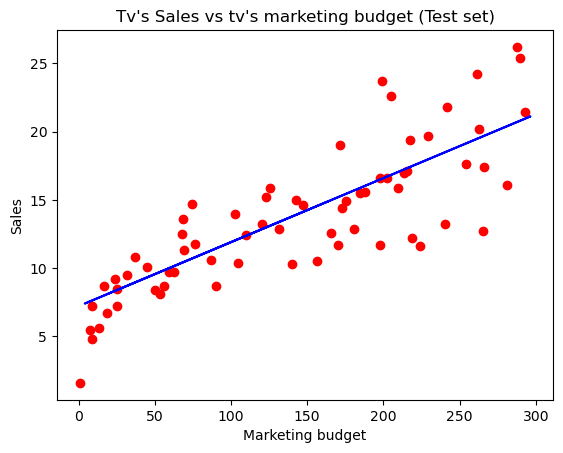

In [7]:
#plot graphical representation
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Tv\'s Sales vs tv\'s marketing budget (Test set)')
plt.xlabel('Marketing budget')
plt.ylabel('Sales')
plt.show()




# multiple linear regression

In [8]:
#libraries are already loaded
#now load dataset 
dataset2 =pd.read_csv("50_Startups.csv")
X = dataset2.iloc[:, :-1].values #Select all columns except profit
Y =dataset2.iloc[:,-1].values

In [9]:
#Encoding categorical data
from sklearn.compose import ColumnTransformer  #import sklearn classes
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough') #"passthrough" keep all other rows as it is
X = np.array(ct.fit_transform(X)) #create array

In [10]:
#spliting the dataset into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0) #state of random factors

In [11]:
#train multiple linear regression model 
#for MLR we need same class as SLR from sklearn
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [12]:
#predict test result
y_pred = regressor.predict(X_test)

np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[103015.2  103282.38]
 [132582.28 144259.4 ]
 [132447.74 146121.95]
 [ 71976.1   77798.83]
 [178537.48 191050.39]
 [116161.24 105008.31]
 [ 67851.69  81229.06]
 [ 98791.73  97483.56]
 [113969.44 110352.25]
 [167921.07 166187.94]]


In [13]:
y_pred

array([103015.2 , 132582.28, 132447.74,  71976.1 , 178537.48, 116161.24,
        67851.69,  98791.73, 113969.44, 167921.07])

In [14]:
y_test

array([103282.38, 144259.4 , 146121.95,  77798.83, 191050.39, 105008.31,
        81229.06,  97483.56, 110352.25, 166187.94])

# Polynomial regression

In [15]:
dataset = pd.read_csv('Position_Salaries.csv')
X1 = dataset.iloc[:, 1:-1].values
y1 = dataset.iloc[:, -1].values

train linear regression model on whole data

In [16]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X1,y1)

LinearRegression()

# Training the Polynomial Regression model on the whole dataset

In [17]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X1)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y1)

LinearRegression()

# Visualising the Linear Regression results

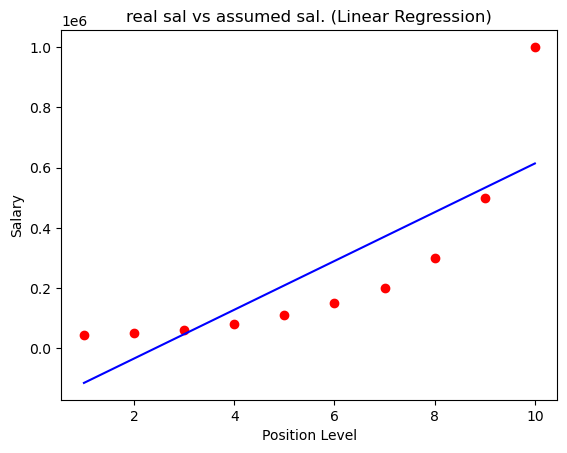

In [18]:
plt.scatter(X1, y1, color = 'red')
plt.plot(X1, lin_reg.predict(X1), color = 'blue')
plt.title('real sal vs assumed sal. (Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

# Visualising polynomial results

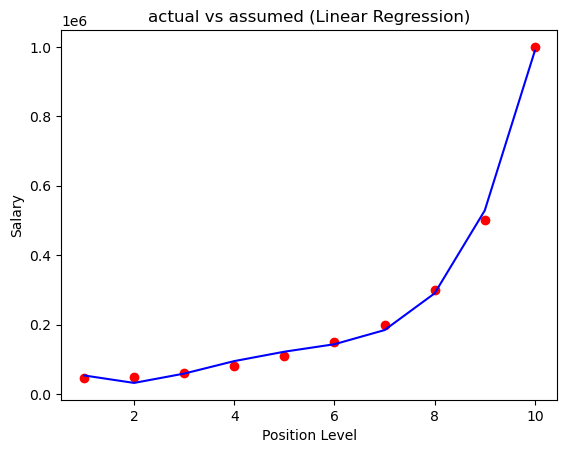

In [19]:
plt.scatter(X1, y1, color = 'red')
plt.plot(X1, lin_reg_2.predict(poly_reg.fit_transform(X1)), color = 'blue')
plt.title('actual vs assumed (Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

predicting new result for linear regression

In [20]:
lin_reg.predict([[6.5]])

array([330378.79])

predicting result with  polynomial linear regressions

In [21]:
lin_reg_2.predict(poly_reg.fit_transform([[6.5]]))

array([158862.45])

# Support vector regression

In [26]:
dataset2 = pd.read_csv('Position_Salaries.csv')
X2= dataset2.iloc[:, 1:-1].values
y2= dataset2.iloc[:, -1].values

In [27]:
print(X2)
print(y2)#reshape it to vertical array (2d)
y2=y2.reshape(len(y2),1)


[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


********Apply features scaling *********

In [83]:
from sklearn.preprocessing import StandardScaler
sc_X =StandardScaler()
X2=sc_X.fit_transform(X2)
sc_y =StandardScaler()
y2=sc_y.fit_transform(y2)#apply on both feature and dependent variable

In [84]:
print(X2)

[[-1.57]
 [-1.22]
 [-0.87]
 [-0.52]
 [-0.17]
 [ 0.17]
 [ 0.52]
 [ 0.87]
 [ 1.22]
 [ 1.57]]


In [86]:
print(y2)

[[-0.72]
 [-0.7 ]
 [-0.67]
 [-0.6 ]
 [-0.49]
 [-0.35]
 [-0.17]
 [ 0.18]
 [ 0.88]
 [ 2.64]]


In [89]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')#"Gaussian radial basis function(RBF)"
regressor.fit(X2, y1)

C:\Users\pawan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()